In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import random

# model imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# processing imports
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
file_path_train = "SYBIL_MODIFIED.csv"
file_path_test = "SYBIL_TEST.csv"
df = pd.read_csv(file_path_train)
test_df = pd.read_csv(file_path_test)
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level,attack_flag,attack_map,att_type
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,normal,15,0,0,not
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.0,0.00,neptune,19,1,1,dos_attack
2,0,tcp,http,SF,232,8153,0,0,0,0,...,0.04,0.03,0.01,0.0,0.01,normal,21,0,0,not
3,0,tcp,http,SF,199,420,0,0,0,0,...,0.00,0.00,0.00,0.0,0.00,normal,21,0,0,not
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.00,0.00,1.0,1.00,neptune,21,1,1,dos_attack


In [3]:
print(df.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'attack', 'level', 'attack_flag',
       'attack_map', 'att_type'],
      dtype='object')


In [3]:
attack_vs_loggedin = pd.crosstab(df.attack,df.att_type=='sybil')
attack_vs_loggedin

att_type,False,True
attack,,
apache2,737,0
back,1315,0
buffer_overflow,50,0
ftp_write,0,11
guess_passwd,0,1284
httptunnel,133,0
imap,0,12
ipsweep,3740,0
land,25,0


In [5]:
attack_vs_flag = pd.crosstab(df.att_type=='sybil', df.flag)
attack_vs_flag

flag,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
att_type,,,,,,,,,,,
False,50,15079,2261,105,3083,36864,380,141,291,86183,340
True,0,3,74,0,7,0,6,1,7,3636,4


In [7]:
attack_vs_protocol = pd.crosstab(df.att_type, df.protocol_type)
attack_vs_protocol

protocol_type,icmp,tcp,udp
att_type,,,
U2R,0,105,3
dos_attack,3553,48927,906
not,1402,61594,14210
probe_attack,4375,7721,1981
sybil,4,3220,514


In [8]:
src_vs_attack = pd.crosstab(df.att_type,df.src_bytes==0)
src_vs_attack

src_bytes,False,True
att_type,,
U2R,94,14
dos_attack,6579,46807
not,73517,3689
probe_attack,7608,6469
sybil,3700,38


In [8]:
dst_vs_attack = pd.crosstab(df.att_type,df.dst_bytes==0)
dst_vs_attack

dst_bytes,False,True
att_type,,
U2R,96,12
dos_attack,2357,51029
not,65384,11822
probe_attack,960,13117
sybil,2387,1351


In [9]:
duration_vs_attack = pd.crosstab(df.att_type,df.duration==0)
duration_vs_attack

duration,False,True
att_type,,
U2R,82,26
dos_attack,1308,52078
not,8399,68807
probe_attack,1860,12217
sybil,1895,1843


In [10]:
logged_in_vs_attack = pd.crosstab(df.att_type,df.logged_in)
logged_in_vs_attack

logged_in,0,1
att_type,,
U2R,20,88
dos_attack,51284,2102
not,21985,55221
probe_attack,13859,218
sybil,1546,2192


In [11]:
logged_in_vs_attack_type = pd.crosstab(df.attack,df.logged_in,)
logged_in_vs_attack_type 

logged_in,0,1
attack,,
apache2,246,491
back,0,1315
buffer_overflow,2,48
ftp_write,3,8
guess_passwd,522,762
httptunnel,131,2
imap,11,1
ipsweep,3715,25
land,25,0


In [12]:
srv_count_vs_attack =pd.crosstab(df.att_type,df.srv_count)
srv_count_vs_attack

srv_count,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
att_type,,,,,,,,,,,,,,,,,,,,,
U2R,0,98,5,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
dos_attack,0,3489,2970,2921,2762,2483,2257,2113,2147,2091,...,2,2,1,1,2,5,16,63,199,1088
not,11,18079,9239,4304,3465,2756,2380,2302,1965,1896,...,2,10,0,12,10,12,22,50,41,174
probe_attack,3,6926,1818,378,265,219,201,169,164,167,...,0,0,0,0,0,0,0,0,0,0
sybil,0,2751,698,128,82,52,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# helper function for drawing mulitple charts.
def bake_pies(data_list,labels):
    list_length = len(data_list)
    
    # setup for mapping colors
    color_list = sns.color_palette()
    color_cycle = itertools.cycle(color_list)
    cdict = {}
    
    # build the subplots
    fig, axs = plt.subplots(1, list_length,figsize=(18,10), tight_layout=False)
    plt.subplots_adjust(wspace=1/list_length)
    
    # loop through the data sets and build the charts
    for count, data_set in enumerate(data_list): 
        
        # update our color mapt with new values
        for num, value in enumerate(np.unique(data_set.index)):
            if value not in cdict:
                cdict[value] = next(color_cycle)
       
        # build the wedges
        wedges,texts = axs[count].pie(data_set,
                           colors=[cdict[v] for v in data_set.index])

        # build the legend
        axs[count].legend(wedges, data_set.index,
                           title="Flags",
                           loc="center left",
                           bbox_to_anchor=(1, 0, 0.5, 1))
        # set the title
        axs[count].set_title(labels[count])
        
    return axs   

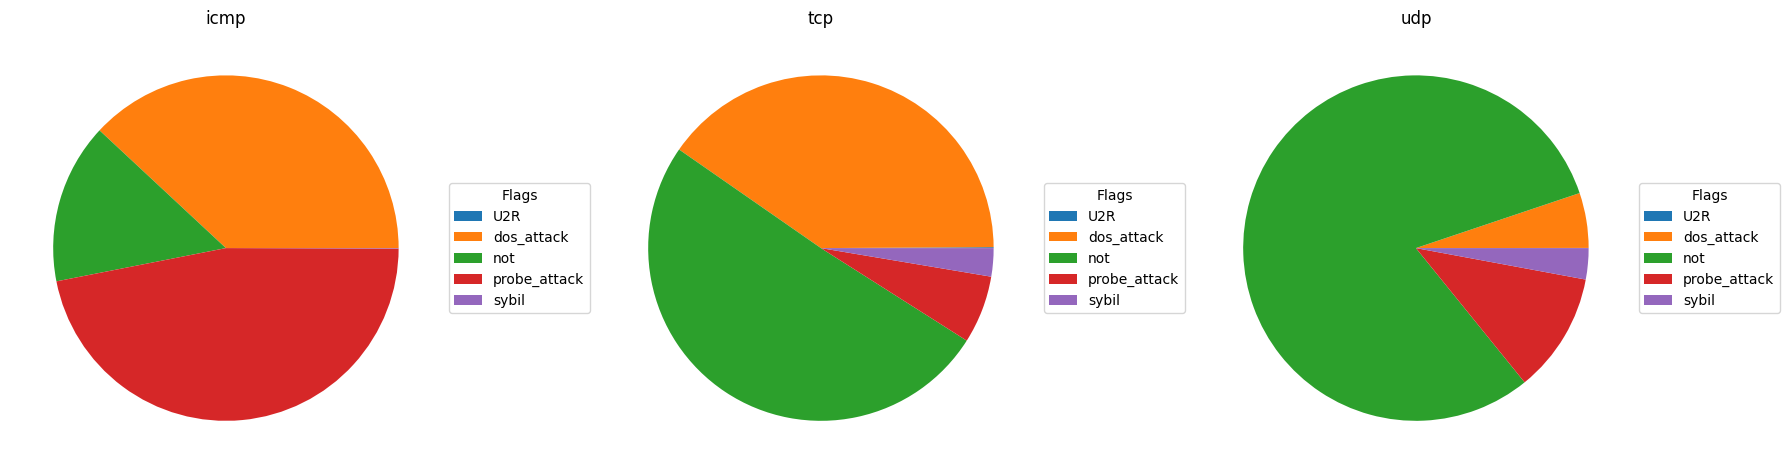

In [14]:
# get the series for each protocol
icmp_attacks = attack_vs_protocol.icmp
tcp_attacks = attack_vs_protocol.tcp
udp_attacks = attack_vs_protocol.udp

# create the charts
bake_pies([icmp_attacks, tcp_attacks, udp_attacks],['icmp','tcp','udp'])
plt.show()

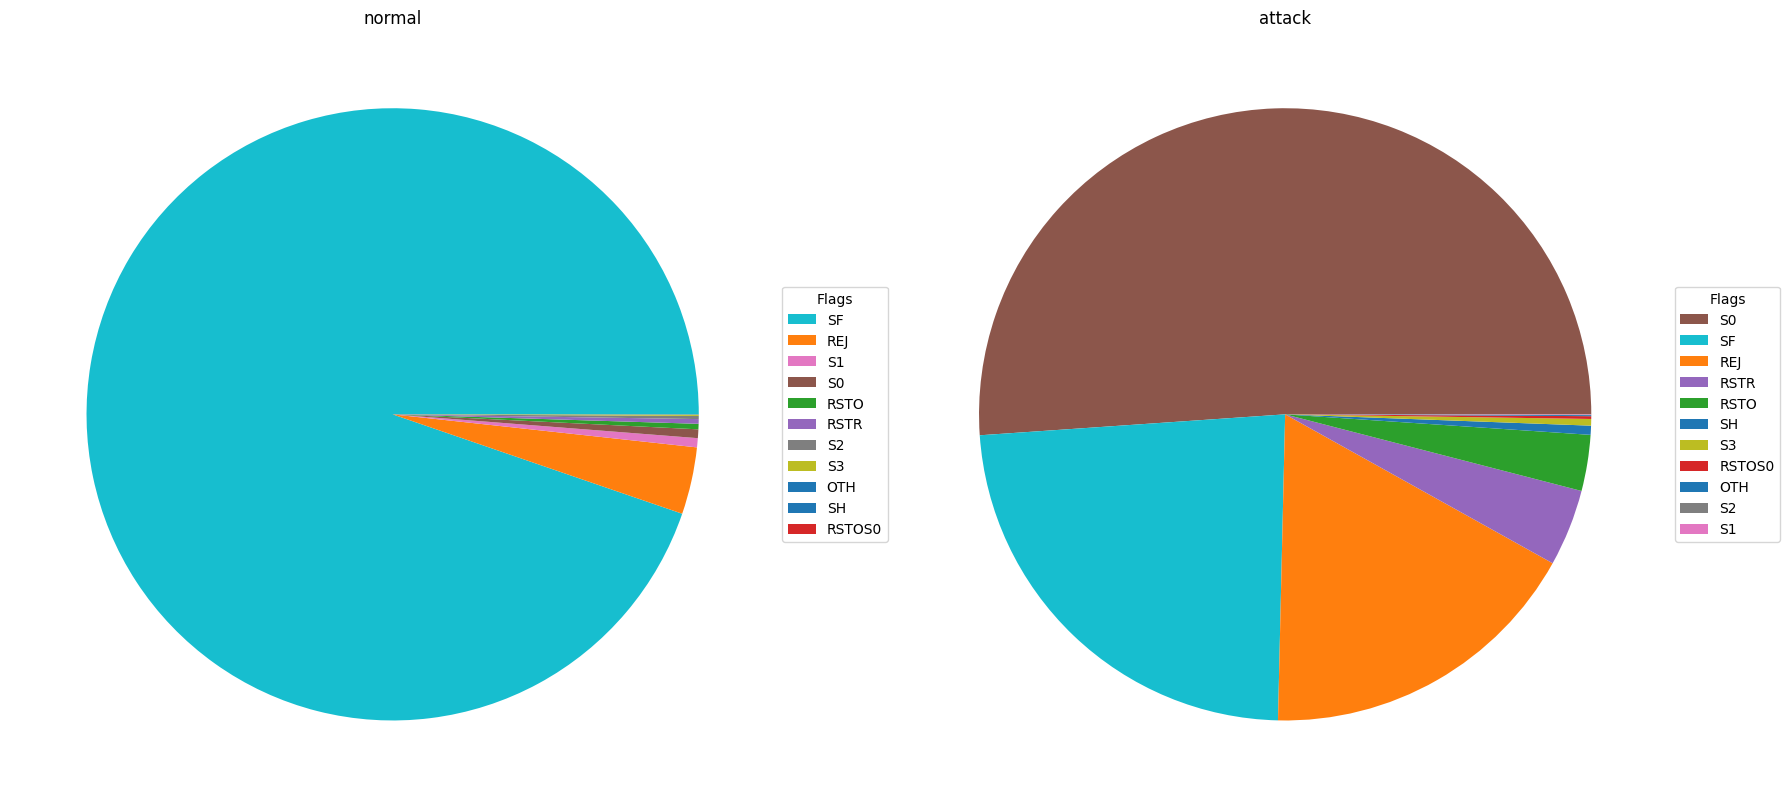

In [15]:
# get a series with the count of each flag for attack and normal traffic
normal_flags = df.loc[df.attack_flag == 0].flag.value_counts()
attack_flags = df.loc[df.attack_flag == 1].flag.value_counts()

# create the charts
flag_axs = bake_pies([normal_flags, attack_flags], ['normal','attack'])        
plt.show()

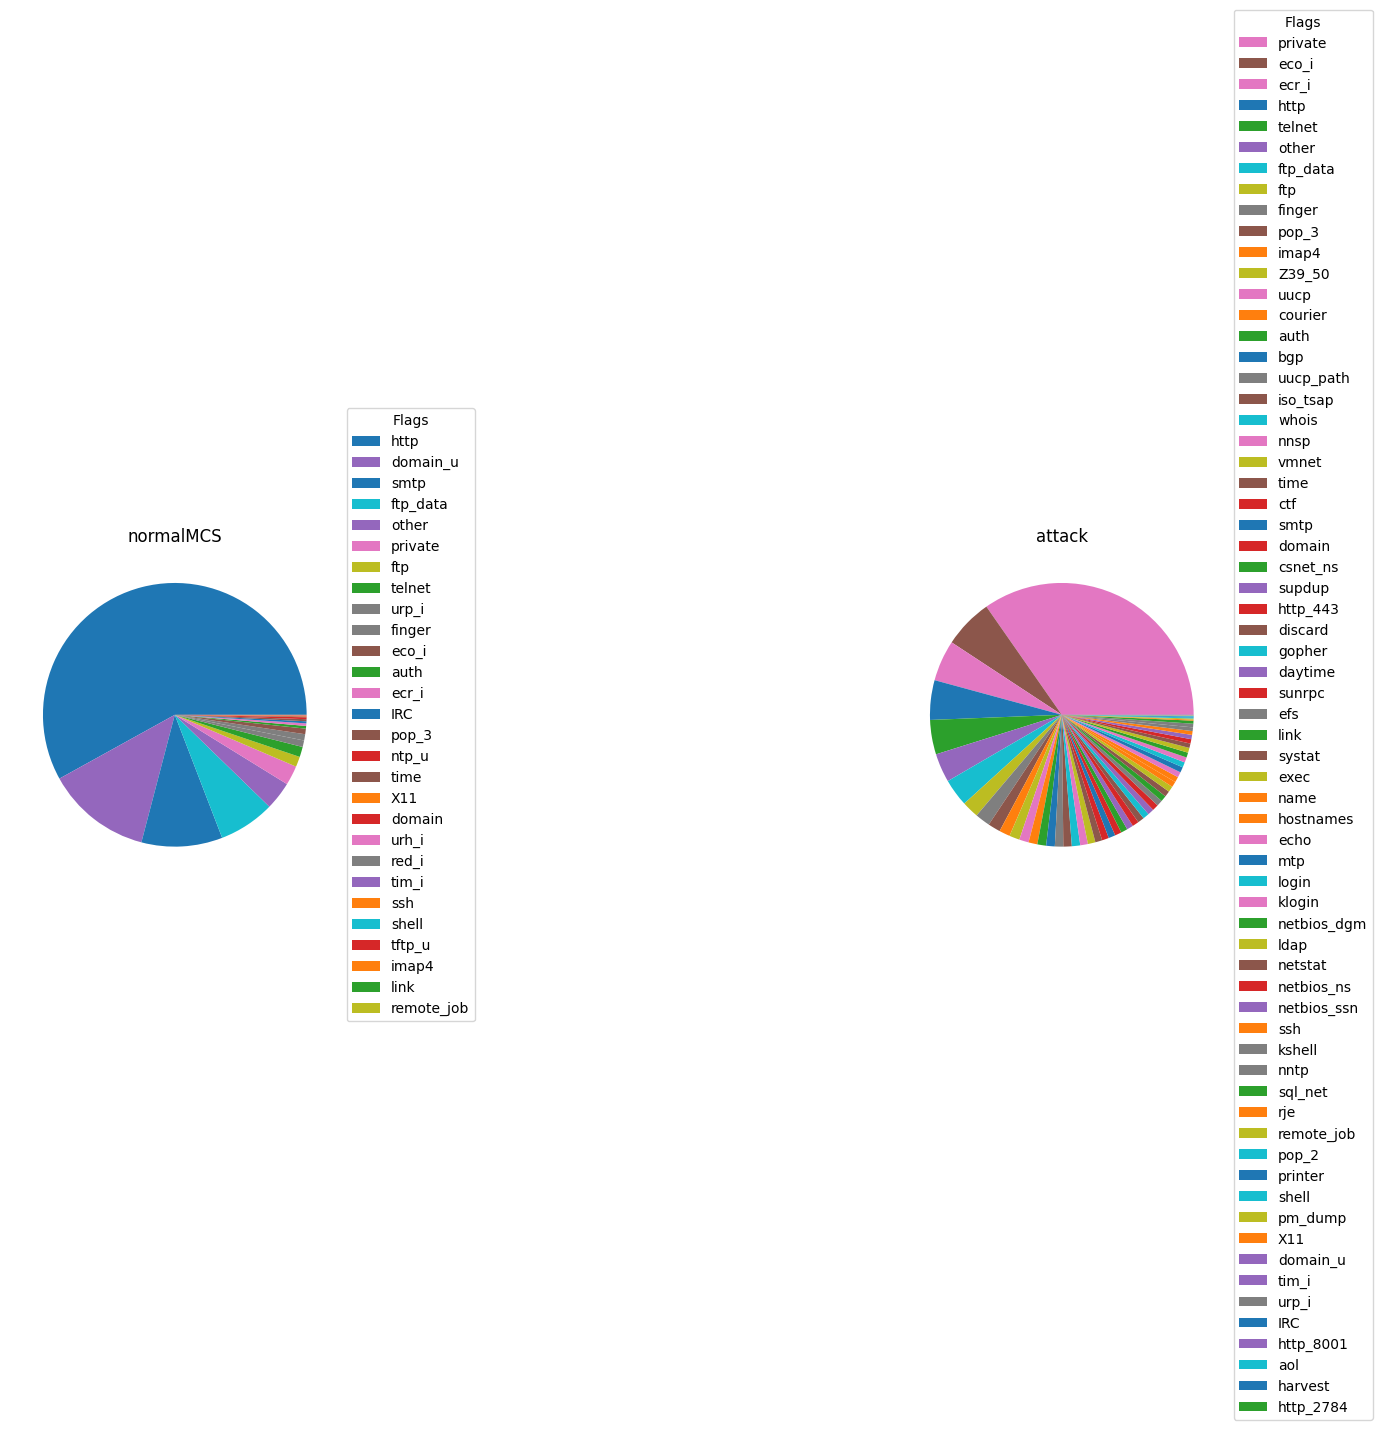

In [16]:
# get a series with the count of each service for attack and normal MCS
normal_services = df.loc[df.attack_flag == 0].service.value_counts()
attack_services = df.loc[df.attack_flag == 1].service.value_counts()

# create the charts
service_axs = bake_pies([normal_services, attack_services], ['normalMCS','attack'])        
plt.show()

In [4]:
# get the intial set of encoded features and encode them
features_to_encode = ['protocol_type', 'service', 'flag']
encoded = pd.get_dummies(df[features_to_encode])
test_encoded_base = pd.get_dummies(test_df[features_to_encode])

# not all of the features are in the test set, so we need to account for diffs
test_index = np.arange(len(test_df.index))
column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

# we'll also need to reorder the columns to match, so let's get those
column_order = encoded.columns.to_list()

# append the new columns
test_encoded_temp = test_encoded_base.join(diff_df)

# reorder the columns
test_final = test_encoded_temp[column_order].fillna(0)

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes','count','srv_count']
numeric_features = ['duration', 'src_bytes', 'dst_bytes','count','srv_count','logged_in']

# model to fit/test
to_fit = encoded.join(df[numeric_features])
test_set = test_final.join(test_df[numeric_features])

In [5]:
# create our target classifications
binary_y = df['attack_flag']
multi_y = df['attack_map']

test_binary_y = test_df['attack_flag']
test_multi_y = test_df['attack_map']


In [7]:
# model for the multiclass classification
multi_model1 = RandomForestClassifier()
multi_model1.fit(to_fit, multi_y)
multi_predictions1 = multi_model1.predict(test_set)

# calculate and display our base accuracty
multi_base_rf_score1 = accuracy_score(multi_predictions1,test_multi_y)*100
multi_base_rf_score1

98.51838708246461

In [8]:
# model for the binary classification
binary_model1 = RandomForestClassifier()
binary_model1.fit(to_fit, binary_y)
binary_predictions1 = binary_model1.predict(test_set)

# calculate and display our base accuracty
binary_base_rf_score1 = accuracy_score(binary_predictions1,test_binary_y)*100
binary_base_rf_score1

98.85995652752517

In [9]:
# model for the multiclass classification
multi_model2 = KNeighborsClassifier()
multi_model2.fit(to_fit, multi_y)
multi_predictions2 = multi_model2.predict(test_set)

# calculate and display our base accuracty
multi_base_rf_score2 = accuracy_score(multi_predictions2,test_multi_y)*100
multi_base_rf_score2

96.85489952535154

In [16]:
# model for the binary classification
binary_model2 = KNeighborsClassifier()
binary_model2.fit(to_fit, binary_y)
binary_predictions2 = binary_model1.predict(test_set)

# calculate and display our base accuracty
binary_base_rf_score2= accuracy_score(binary_predictions1,test_binary_y)*100
binary_base_rf_score2

98.85995652752517

In [22]:
# model for the multiclass classification
multi_model3 = DecisionTreeClassifier()
multi_model3.fit(to_fit, multi_y)
multi_predictions3 = multi_model3.predict(test_set)

# calculate and display our base accuracty
multi_base_rf_score3 = accuracy_score(multi_predictions3,test_multi_y)*100
multi_base_rf_score3

98.55831078383534

In [21]:
binary_model3 = DecisionTreeClassifier()
binary_model3.fit(to_fit, binary_y)
binary_predictions3 = binary_model3.predict(test_set)

# calculate and display our base accuracty
binary_base_rf_score3 = accuracy_score(binary_predictions3,test_binary_y)*100
binary_base_rf_score3

98.87770039480105

In [23]:
binary_model4 = LinearSVC(tol=0.0001,C=10,max_iter=10000)
binary_model4.fit(to_fit, binary_y)
binary_predictions4 = binary_model4.predict(test_set)

# calculate and display our base accuracty
binary_base_rf_score4 = accuracy_score(binary_predictions4,test_binary_y)*100
binary_base_rf_score4

In [12]:
# model for the multiclass classification
# multi_model4 = LinearSVC(tol=0.0001,C=10,max_iter=10000)
# multi_model4.fit(multi_train_X, multi_train_y)
# multi_predictions4 = multi_model4.predict(multi_val_X)

# # calculate and display our base accuracty
# base_rf_score44 = accuracy_score(multi_predictions4,multi_val_y)*100
# base_rf_score44

c:\users\giria\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\giria\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\giria\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\giria\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\users\giria\appdata\local\programs\python\python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

<Axes: >

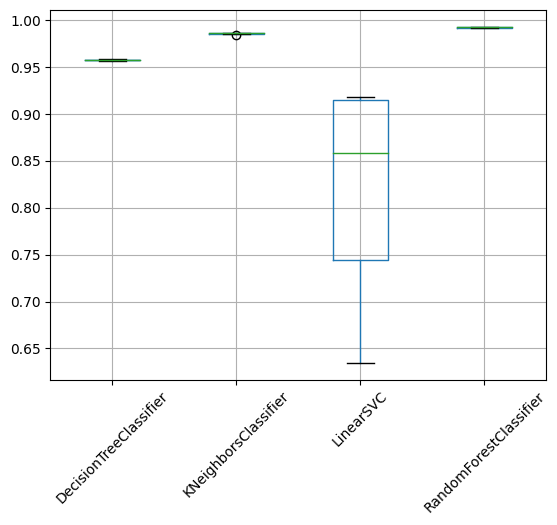

In [64]:
# define the list of models that we want to test
binarymodels = [
    RandomForestClassifier(),
    # LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
    DecisionTreeClassifier(),
    LinearSVC(tol=0.0001,C=10,max_iter=10000)
]

# an empty list to capture the performance of each model
model_comps = []

# walk through the models and populate our list
for model in binarymodels:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, to_fit, binary_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps.append((model_name, count, accuracy))

# a box plot will do well to show us overall performance and the variation in the models.
result_df = pd.DataFrame(model_comps, columns=['model_name', 'count', 'accuracy'])
result_df.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)

<Axes: >

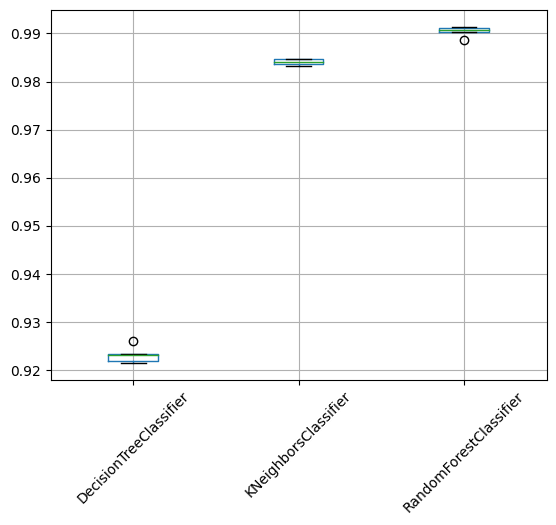

In [5]:
# define the list of models that we want to test
multiClassModels = [
    RandomForestClassifier(),
    # LogisticRegression(max_iter=250),
    KNeighborsClassifier(),
    DecisionTreeClassifier(max_depth=3),
    # LinearSVC(tol=0.0001,C=10,max_iter=10000)
]

# an empty list to capture the performance of each model
model_comps2 = []

# walk through the models and populate our list
for model in multiClassModels:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, to_fit, multi_y, scoring='accuracy')
    for count, accuracy in enumerate(accuracies):
        model_comps2.append((model_name, count, accuracy))

# a box plot will do well to show us overall performance and the variation in the models.
result_df2 = pd.DataFrame(model_comps2, columns=['model_name', 'count', 'accuracy'])
result_df2.pivot(index='count',columns='model_name',values='accuracy').boxplot(rot=45)

In [13]:
# a helper function for getting some analytical data about our predictions
def add_predictions(data_set,predictions,y):
    prediction_series = pd.Series(predictions, index=y.index)

    # we need to add the predicted and actual outcomes to the data
    predicted_vs_actual = data_set.assign(predicted=prediction_series)
    original_data = predicted_vs_actual.assign(actual=y).dropna()
    conf_matrix = confusion_matrix(original_data['actual'], 
                                   original_data['predicted'])
    
    # capture rows with failed predictions
    base_errors = original_data[original_data['actual'] != original_data['predicted']]
    
    # drop columns with no value
    non_zeros = base_errors.loc[:,(base_errors != 0).any(axis=0)]

    # idetify the type of error
    false_positives = non_zeros.loc[non_zeros.actual==0]
    false_negatives = non_zeros.loc[non_zeros.actual==1]

    # put everything into an object
    prediction_data = {'data': original_data,
                       'confusion_matrix': conf_matrix,
                       'errors': base_errors,
                       'non_zeros': non_zeros,
                       'false_positives': false_positives,
                       'false_negatives': false_negatives}
    
    return prediction_data



<Axes: >

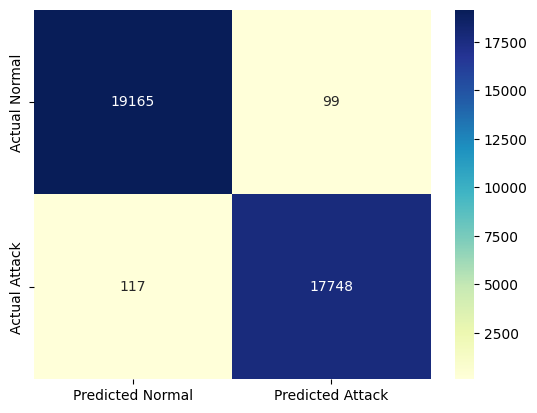

In [14]:
binary_prediction_data = add_predictions(df,
                                         binary_predictions1,
                                         test_binary_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=binary_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted Attack'],
            yticklabels = ['Actual Normal','Actual Attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)

# sns.barplot(data=binary_prediction_data['confusion_matrix'])
# sns.boxplot(data=binary_prediction_data['confusion_matrix'],)


<Axes: >

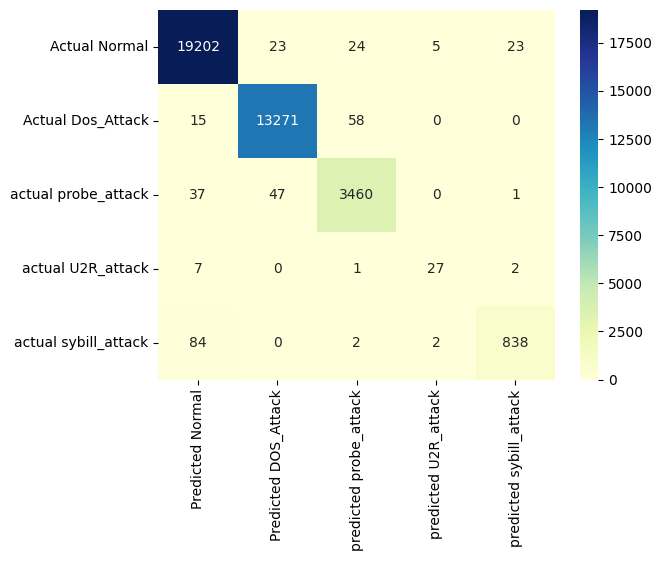

In [15]:
multi_prediction_data = add_predictions(df,
                                         multi_predictions1,
                                         test_multi_y)

# create a heatmap of the confusion matrix
sns.heatmap(data=multi_prediction_data['confusion_matrix'],
            xticklabels = ['Predicted Normal','Predicted DOS_Attack','predicted probe_attack','predicted U2R_attack','predicted sybill_attack'],
            yticklabels = ['Actual Normal','Actual Dos_Attack','actual probe_attack','actual U2R_attack','actual sybill_attack'],
            cmap="YlGnBu",
            fmt='d',
            annot=True)
